## Check Installation

### Numpy installed ?

In [29]:
import numpy as np
print("I like ", np.pi)

I like  3.141592653589793


### SciPy & Matplotlib installed ?

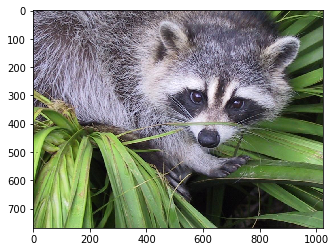

In [30]:
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face()
plt.imshow(face)
plt.show()

## Application

### Gaussian filter

#### Array

In [31]:
from scipy.ndimage import gaussian_filter
a = np.arange(50, step=2).reshape((5,5))
print(a)

print(gaussian_filter(a, sigma=1))

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]
[[ 4  6  8  9 11]
 [10 12 14 15 17]
 [20 22 24 25 27]
 [29 31 33 34 36]
 [35 37 39 40 42]]


#### Image

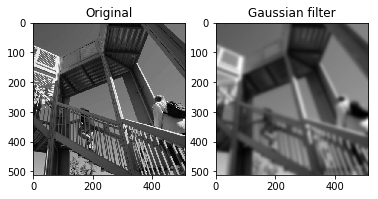

In [44]:
from scipy.ndimage import gaussian_filter
from scipy import misc

img = misc.ascent()
img_gaussian = gaussian_filter(img, sigma=5)

fig = plt.figure()
plt.gray()

ax1 = fig.add_subplot(121)
ax1.set_title("Original")

ax2 = fig.add_subplot(122)
ax2.set_title("Gaussian filter")

ax1.imshow(img)
ax2.imshow(img_gaussian)
plt.show()

### Sharpening image

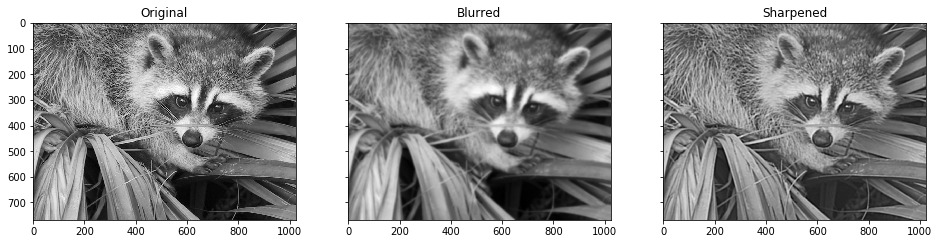

In [42]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt

f = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(f, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 10),
                       sharex=True, sharey=True)

ax[0].imshow(f, cmap=plt.cm.gray)
ax[0].set_title("Original")


ax[1].imshow(blurred_f, cmap=plt.cm.gray)
ax[1].set_title("Blurred")

ax[2].imshow(sharpened, cmap=plt.cm.gray)
ax[2].set_title("Sharpened")

plt.show()

### Denoising

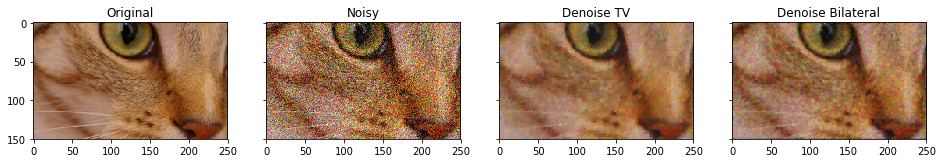

In [37]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral

original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 10),
                       sharex=True, sharey=True)

ax[0].imshow(original)
ax[0].set_title("Original")

ax[1].imshow(noisy)
ax[1].set_title("Noisy")

ax[2].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[2].set_title("Denoise TV")

ax[3].imshow(denoise_bilateral(noisy, multichannel=True))
ax[3].set_title("Denoise Bilateral")

plt.show()